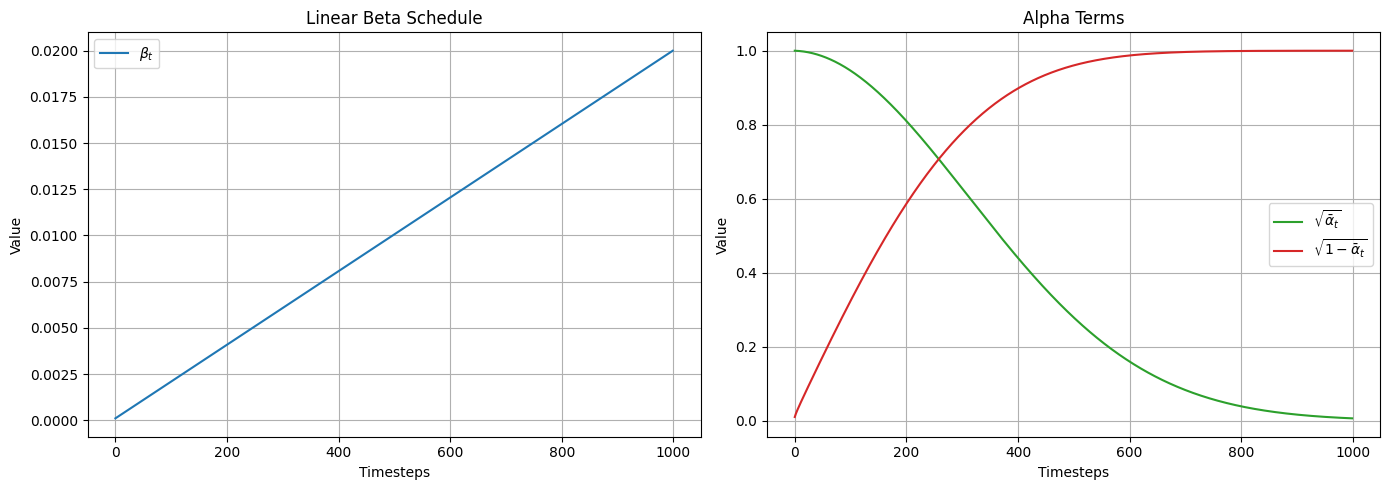

In [6]:
# plot this noise scheduler, beta, sqrt(1-alpha), sqrt(alpha) whre alpha = 1 - beta
#   noise_scheduler:
#     num_train_timesteps: 1000
#     beta_schedule: "linear" # originally using "squaredcos_cap_v2", changed to linear
#     beta_start: 0.0001 # default 0.0001
#     beta_end: 0.02 # default 0.02


import numpy as np
import matplotlib.pyplot as plt

def plot_noise_scheduler(num_train_timesteps=1000, beta_start=0.0001, beta_end=0.02):
    # Create a linear beta schedule
    beta = np.linspace(beta_start, beta_end, num_train_timesteps)
    
    # Calculate alpha and 1 - alpha
    alpha = 1 - beta
    tilde_alpha = np.zeros(num_train_timesteps)
    for t in range(num_train_timesteps):
        if t == 0:
            tilde_alpha[t] = alpha[t]
        else:
            tilde_alpha[t] = tilde_alpha[t-1] * alpha[t]

    sqrt_tilde_alpha = np.sqrt(tilde_alpha)
    sqrt_one_minus_tilde_alpha = np.sqrt(1 - tilde_alpha)
    
    # Create subplots side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
    
    # First plot: beta schedule
    ax1.plot(range(num_train_timesteps), beta, label=r"$\beta_t$", color="tab:blue")
    ax1.set_xlabel('Timesteps')
    ax1.set_ylabel('Value')
    ax1.set_title('Linear Beta Schedule')
    ax1.legend()
    ax1.grid()

    # Second plot: alpha-related values
    ax2.plot(range(num_train_timesteps), sqrt_tilde_alpha, label=r"$\sqrt{\bar{\alpha}_t}$", color="tab:green")
    ax2.plot(range(num_train_timesteps), sqrt_one_minus_tilde_alpha, label=r"$\sqrt{1 - \bar{\alpha}_t}$", color="tab:red")
    ax2.set_xlabel('Timesteps')
    ax2.set_ylabel('Value')
    ax2.set_title('Alpha Terms')
    ax2.legend()
    ax2.grid()
    
    # Adjust layout and show
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    plot_noise_scheduler(num_train_timesteps=1000, beta_start=0.0001, beta_end=0.02)
